In [105]:
from os import path
import ee
import geemap
import math
import geopandas as gpd

In [2]:
ee.Initialize()

#### Dummy data generation

##### Functions

In [20]:
def generate_square_centroid(coordinates, edge = 100):
    return ee.Geometry.Point(coordinates).buffer(edge/2).bounds()

In [88]:
def get_centroid(feature):
    # Get the centroid of the feature's geometry.
    centroid = feature.geometry().centroid()
    # Return a new Feature, copying properties from the old Feature.
    return ee.Feature(centroid).copyProperties(feature)
    # Alternative: Keep this list of properties.
    # keepProperties = []
    # return ee.Feature(centroid).copyProperties(feature, keepProperties)

In [96]:
def get_square_centroid(feature, edge = 100):
    # Get the centroid of the feature's geometry.
    centroid = feature.geometry().centroid().buffer(edge/2).bounds()
    # Return a new Feature, copying properties from the old Feature.
    return ee.Feature(centroid).copyProperties(feature)
    # Alternative: Keep this list of properties.
    # keepProperties = []
    # return ee.Feature(centroid).copyProperties(feature, keepProperties)

##### Scripts

In [109]:
# Get countries FeatureCollection
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")

# Create 1 ha Square Centroids
countries_square_centroids = countries.map(get_square_centroid)

In [114]:
# Set output directory
# out_dir = path.join(path.dirname(__file__), '..', 'raw_data', 'dummy')
out_dir = path.join(os.getcwd(), '..', 'raw_data', 'dummy')

# if not os.path.exists(out_dir):
    # os.makedirs(out_dir)
    
# Export locally
out_shp = os.path.join(out_dir, "countries_square_centroids.shp")
out_shp
# geemap.ee_export_vector(countries_square_centroids, out_shp, verbose=True)

'/root/code/TmtStss/gee-tutorials/Image/../raw_data/dummy/countries_square_centroids.shp'

In [111]:
# Export to Google Drive
geemap.ee_export_vector_to_drive(collection = countries_square_centroids, folder ='fra-rss-map/data/dummy', fileFormat = 'shp')

Exporting myExportTableTask... Please check the Task Manager from the JavaScript Code Editor.


In [ ]:

#
ee.FeatureCollection.toDictionary
Export.table.toDrive(square_centroids, folder = 'fra-rss-map/data/dummy', fileFormat = 'SHP')

In [98]:
square_centroids.first().getInfo()

{'type': 'Feature',
 'geometry': {'geodesic': False,
  'type': 'Polygon',
  'coordinates': [[[18.657271490813518, 15.316567353963176],
    [18.658198393764017, 15.316567353963176],
    [18.658198393764017, 15.317467067649089],
    [18.657271490813518, 15.317467067649089],
    [18.657271490813518, 15.316567353963176]]]},
 'id': '00000000000000000000',
 'properties': {'abbreviati': '',
  'country_co': 'CD',
  'country_na': 'Chad',
  'wld_rgn': 'Africa'}}

In [ ]:
// This function creates a new feature from the centroid of the geometry.
var getCentroid = function(feature) {
  // Keep this list of properties.
  var keepProperties = ['name', 'huc6', 'tnmid', 'areasqkm'];
  // Get the centroid of the feature's geometry.
  var centroid = feature.geometry().centroid();
  // Return a new Feature, copying properties from the old Feature.
  return ee.Feature(centroid).copyProperties(feature, keepProperties);
};

// Map the centroid getting function over the features.
var centroids = sheds.map(getCentroid);

// Display the results.
Map.addLayer(centroids, {color: 'FF0000'}, 'centroids');

In [42]:
countries_gdf = gpd.GeoDataFrame(countries)

ValueError: DataFrame constructor not properly called!

In [41]:
countries.getInfo()

KeyboardInterrupt: 

In [ ]:
countries_centroid = 

In [57]:
# Get countries Polygons
path_to_data = gpd.datasets.get_path("naturalearth_lowres")
gdf = gpd.read_file(path_to_data)

# Create centroids and make it the geometry
gdf['centroid'] = gdf.centroid
# gdf = gdf.set_geometry(gdf['centroid'])
gdf = gdf.rename(columns={'geometry': 'borders'}).set_geometry('centroid')

# gdf.geometry.name # to check for active geometry column

gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders,centroid
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908)
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563)


In [63]:
gdf['buffer'] = gdf.geometry.buffer(10)
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders,centroid,buffer
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631),"POLYGON ((173.85316 -17.31631, 173.80501 -18.2..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773),"POLYGON ((44.75299 -6.25773, 44.70484 -7.23790..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117),"POLYGON ((-2.13783 24.29117, -2.18598 23.31100..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908),"POLYGON ((-88.14238 61.46908, -88.19053 60.488..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563),"POLYGON ((-102.59944 45.70563, -102.64759 44.7..."


In [65]:
gdf.geometry.x

0      163.853165
1       34.752990
2      -12.137831
3      -98.142381
4     -112.599436
          ...    
172     20.819652
173     19.286182
174     20.895356
175    -61.330367
176     30.198618
Length: 177, dtype: float64

In [76]:
point = gdf.at[1,'centroid']
point = ee.Geometry.Point(point)

TypeError: 'Point' object is not iterable

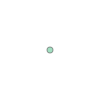

In [74]:
point

In [67]:
generate_square_centroid(gdf.at[1,'centroid']))

TypeError: unhashable type: 'list'

In [34]:
gdf['square_centroid'] = gdf.apply(lambda row: generate_square_centroid(row.geometry), axis = 1)
gdf

EEException: Invalid geometry.

##### Checks

In [21]:
coord_1 = [10.451526, 51.165691]
geom_1 = generate_square_centroid(coord_1)

In [5]:
Map = geemap.Map()
Map.addLayer(geom_1, {}, 'geometry')
Map.centerObject(geom_1)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [6]:
area = geom_1.area(maxError = 0.1)
print('surface in m²:', area.getInfo())

surface in m²: 9944.941861614037
